### Custom sorting of plot series

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

%matplotlib inline

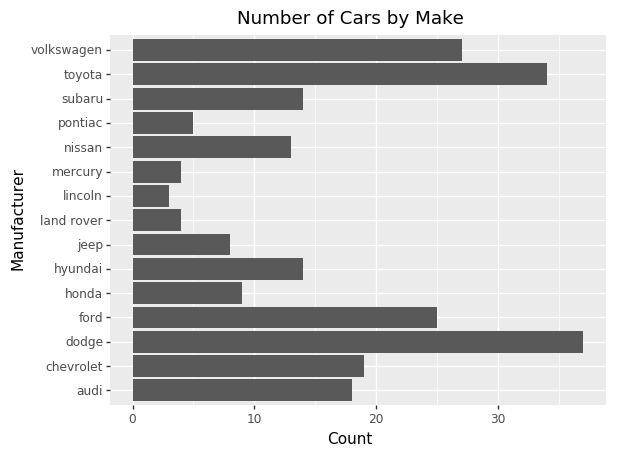

<ggplot: (-9223372036571436302)>

In [2]:
(ggplot(mpg)
 + aes(x='manufacturer')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

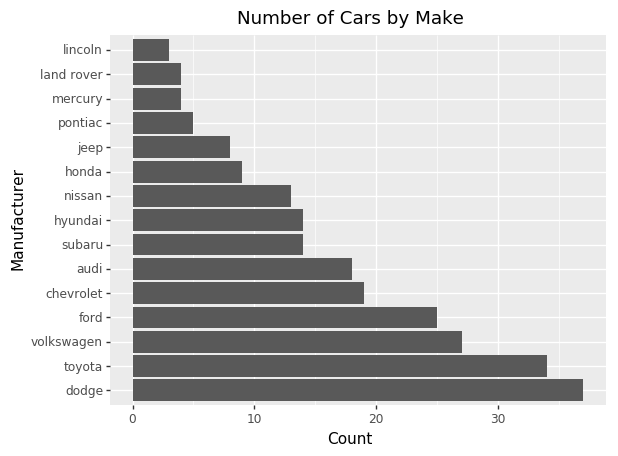

<ggplot: (7551830171)>

In [3]:
# Determine order and create a categorical type
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
manufacturer_cat = CategoricalDtype(categories=manufacturer_list, ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
mpg['manufacturer_cat'] = mpg['manufacturer'].astype(str).astype(manufacturer_cat)

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

In [4]:
mpg['manufacturer_cat'] = mpg['manufacturer'].cat.reorder_categories(manufacturer_list, ordered=True )